# Steps for machine learning modelling:

In [ ]:
#1.Data reading
#2.Data cleaning
#3.Data analysis
#4.Encoding: convert string to integer(types:label encoding,one-hot encoding,dummy encoding,target encoding,ordinary encoding,frequency encoding )
#5.input/output creation:
#6.Train test split
#7.Standard Scalar
#8.Machine Learning Model 
#9.prediction
#10.Accuracy

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading:

In [4]:
#read file:
fraud=pd.read_csv(r"C:\Users\satab\Downloads\Fraud.csv")
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Checking Null Values:

In [5]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# Unique:it checks whether every value is unique and no null values are there in features column.

In [7]:
for i in fraud.columns:
    print(i,':','\n',fraud[i].unique())

step : 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 2

In [8]:
#finding the mean,maximum,frequency,top,standard deviation etc.
d=fraud.describe(include='all')
d

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


# Data Analysis:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


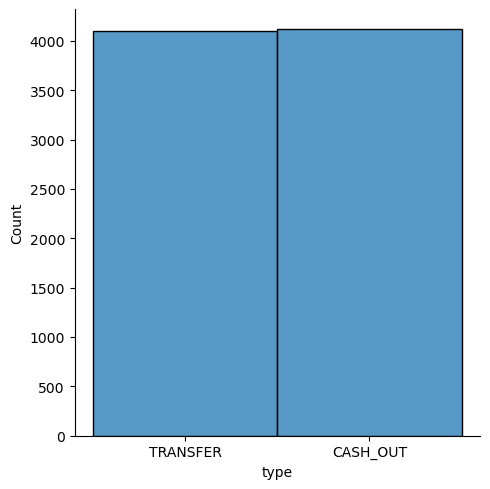

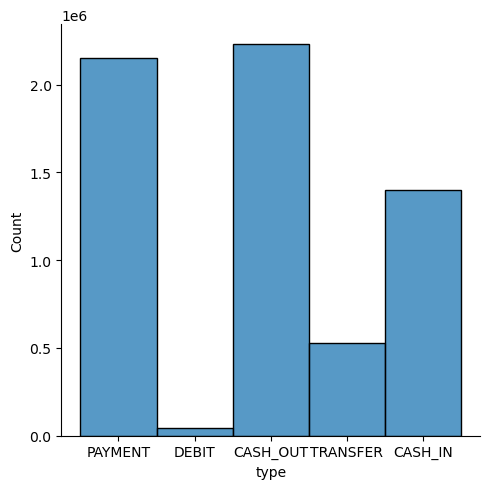

In [9]:
sns.displot(x=fraud.type[fraud.isFraud==1])
sns.displot(x=fraud.type[fraud.isFraud==0])
plt.show()

C:\Users\satab\AppData\Local\Temp\ipykernel_8212\109893084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=fraud.amount[fraud.isFraud==1])
C:\Users\satab\AppData\Local\Temp\ipykernel_8212\109893084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=fraud.amount[fraud.isFraud==0])


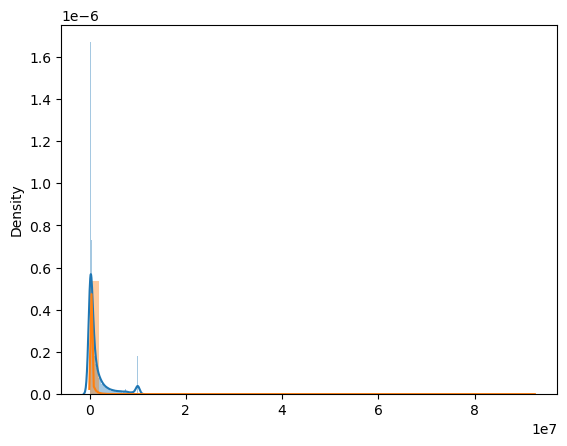

In [9]:
sns.distplot(x=fraud.amount[fraud.isFraud==1])
sns.distplot(x=fraud.amount[fraud.isFraud==0])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


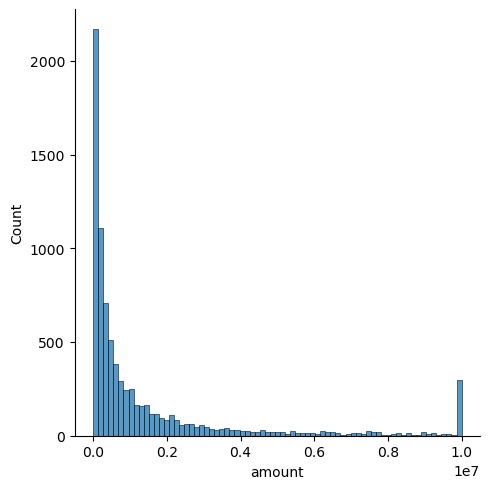

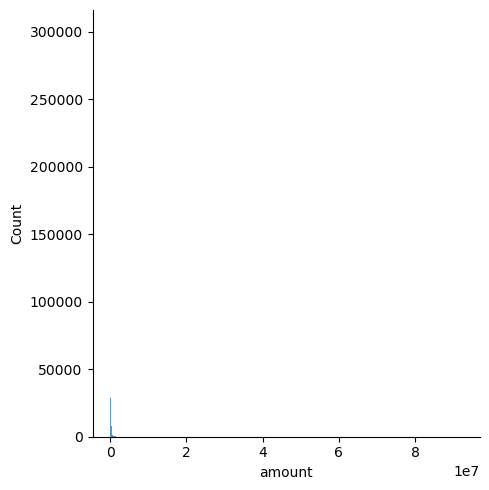

In [11]:
sns.displot(x=fraud.amount[fraud.isFraud==1])
sns.displot(x=fraud.amount[fraud.isFraud==0])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


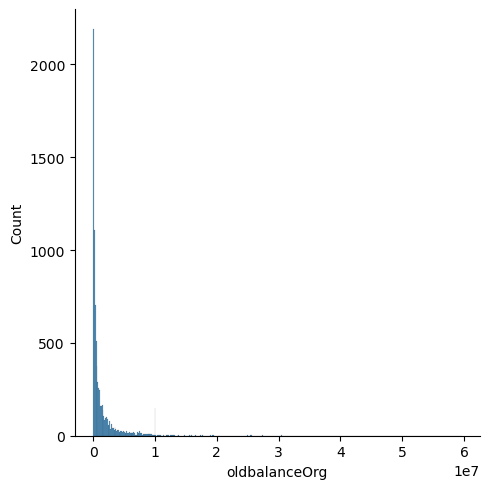

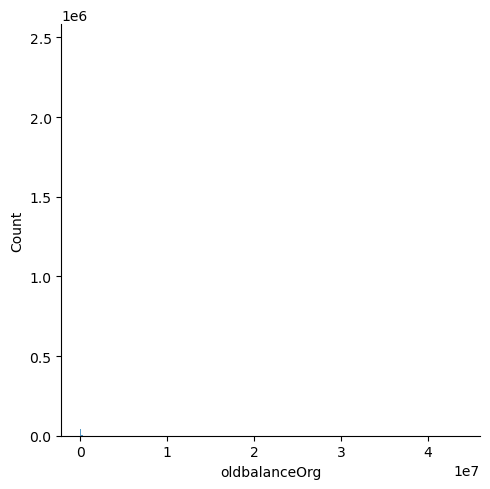

In [12]:
sns.displot(x=fraud.oldbalanceOrg[fraud.isFraud==1])
sns.displot(x=fraud.oldbalanceOrg[fraud.isFraud==0])
plt.show()

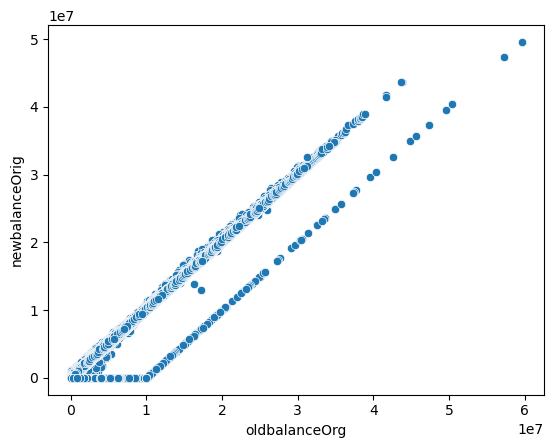

In [14]:
sns.scatterplot(x=fraud.oldbalanceOrg,y=fraud.newbalanceOrig)
plt.show()

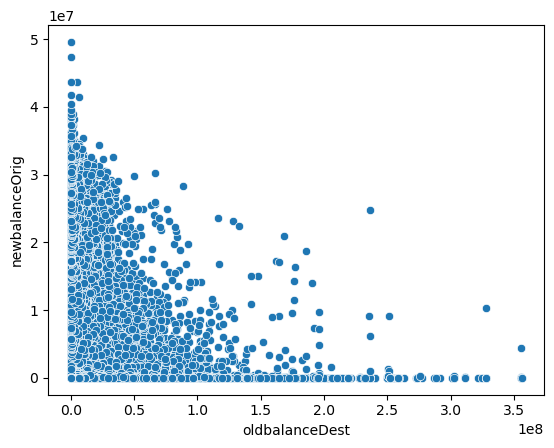

In [15]:
sns.scatterplot(x=fraud.oldbalanceDest,y=fraud.newbalanceOrig)
plt.show()

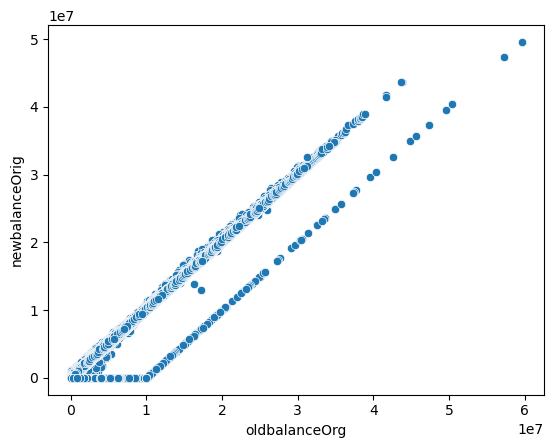

In [17]:
sns.scatterplot(x=fraud.oldbalanceOrg,y=fraud.newbalanceOrig)
plt.show()

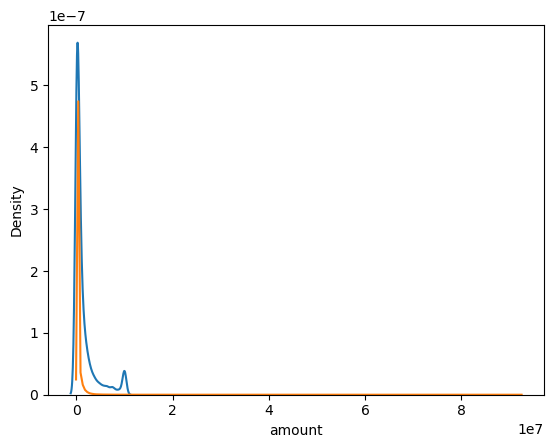

In [18]:
sns.kdeplot(x=fraud.amount[fraud.isFraud==1])
sns.kdeplot(x=fraud.amount[fraud.isFraud==0])
plt.show()

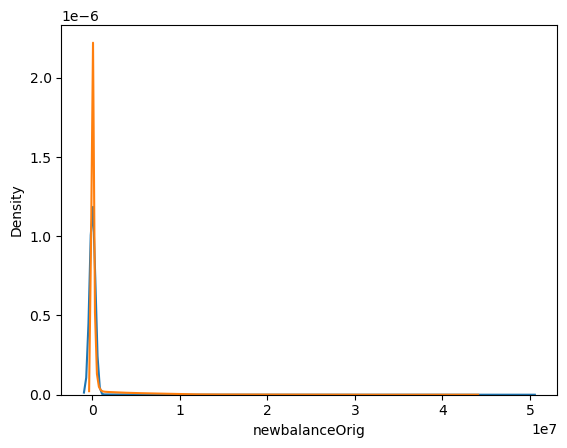

In [20]:
sns.kdeplot(x=fraud.newbalanceOrig[fraud.isFraud==1])
sns.kdeplot(x=fraud.newbalanceOrig[fraud.isFraud==0])
plt.show()

In [15]:
#encoding(converts string to numeric)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fraud.type=le.fit_transform(fraud.type)
le1 = LabelEncoder()
fraud.nameOrig=le1.fit_transform(fraud.nameOrig)
le2 = LabelEncoder()
fraud.nameDest=le2.fit_transform(fraud.nameDest)

In [16]:
#input:
ip=fraud.drop('isFraud',axis=1)
ip

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,0


In [17]:
ip.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0


In [18]:
op=fraud.isFraud
op

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [19]:
op.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

# Correlation plotting specifies that which features are very much reqired for the output and which are not.

# Here type and oldbalOrg,type and newbalorig,type and name,type and oldbalanceDest,amount and nameDest,etc are most correlated features for the output,infact the values with 0.58,-0.1 etc are the most correlated features.

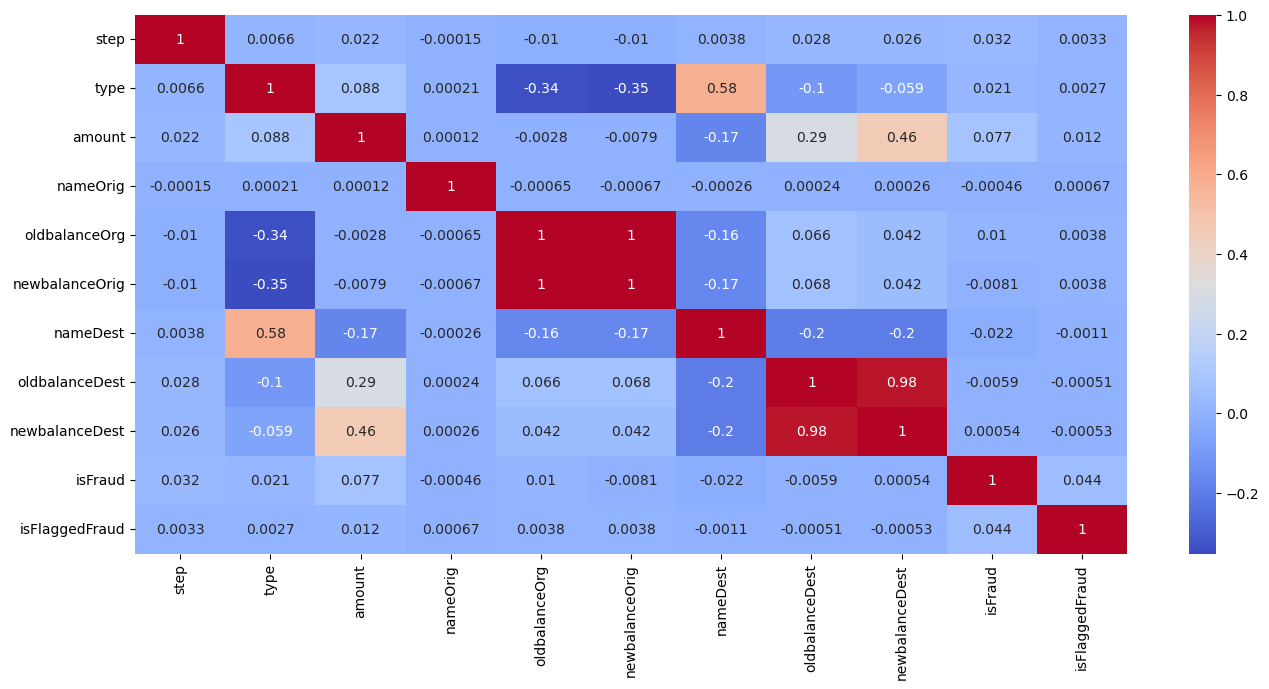

In [20]:
#showing the correlation between features:
plt.figure(figsize=(16,7))
cor = fraud.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

# We spilt dataset into training and testing then testing size is 20% so that it will give better accuracy.

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)

In [22]:
x_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
5843467,402,3,8840.73,6282721,2231.00,0.00,1044916,0.00,0.00,0
4391969,321,3,767.80,234231,460735.00,459967.20,971029,0.00,0.00,0
3987247,298,0,63011.28,2983676,3675022.84,3738034.12,389853,14586212.04,14523200.76,0
5484185,379,1,148143.70,2860895,0.00,0.00,548223,319152.36,467296.06,0
3828207,282,0,449513.12,5348854,17704270.31,18153783.43,185965,860214.58,410701.45,0


In [23]:
x_test.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
159352,12,3,8159.38,4364093,0.0,0.00,1763215,0.00,0.00,0
4379268,311,1,152766.37,3111071,0.0,0.00,537785,596174.73,748941.10,0
1038953,94,1,2432.06,4727075,66086.0,63653.94,250415,250262.13,252694.19,0
565511,23,3,6382.63,1820364,152.0,0.00,2374758,0.00,0.00,0
2265646,187,4,1387434.56,4205186,15833.0,0.00,2538,77989.55,1465424.11,0


In [24]:
y_train.head()

5843467    0
4391969    0
3987247    0
5484185    0
3828207    0
Name: isFraud, dtype: int64

In [25]:
y_test.head()

159352     0
4379268    0
1038953    0
565511     0
2265646    0
Name: isFraud, dtype: int64

# StandardScalar is used to bring the input(x_train and x_test) in a particular range that is the data points have a balanced scale.

In [26]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train) #transform to return output
x_test=sc.fit_transform(x_test)

# Logistic Regression: Since the output is categorical data I used logistic regression for prediction.

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

# We first trained x_train and Y_train and then model is output on x_test which is compared with y_test to obtain the accuracy of the dataset.

In [33]:
#prediction:
ypred=lr.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Measuring the accuracy,precision,F1 score and recall of the dataset:

In [29]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
acc=accuracy_score(ypred,y_test)
rc=recall_score(ypred,y_test,average='micro')
pc=precision_score(ypred,y_test,average='macro')
f1=f1_score(ypred,y_test,average='macro')
print('Accuracy',acc)
print('Recall',rc)
print('Precision',pc)
print('f1 score',f1)

Accuracy 0.9992173035636263
Recall 0.9992173035636263
Precision 0.7153473830838473
f1 score 0.7935075369678142


# Here we gained the accuracy of 99% percentage.

# Confusion matrix: measures the performance of the dataset.

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [31]:
cm=confusion_matrix(ypred,y_test)
cm

array([[1270819,     937],
       [     59,     709]], dtype=int64)

# Plotting of the confusion matrix graph:

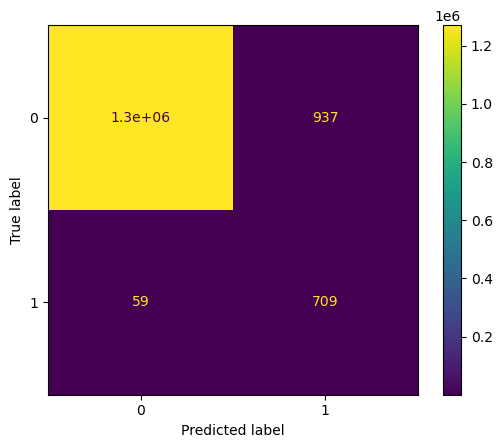

In [32]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()